# A Brief Introduction to Quantum Computing with Qiskit — Build Your First Quantum Circuit!
##### By Hassan Alhusayni, 25 July 2025

**Disclaimer**: The explanations, adaptations, and edits in this notebook reflect my own understanding and do not represent the original authors or sources referenced.

This notebook offers a brief, clear, and concise introduction to the fundamental concepts of quantum computing and quantum mechanics. It is designed to be beginner-friendly while maintaining academic clarity, making it suitable for learners from various backgrounds.

#### Key topics covered include:

* What is Quantum Computing?.

* Superposition and Entanglement.

* Quantum Gates.

* Building Your First Quantum Circuit Using Qiskit from Scratch

**This notebook is available in two versions: English and Arabic**.


At the end, you’ll also find a set of carefully selected resources to continue your quantum learning journey.



### How to Run this Notebook

You can run this notebook either **locally** (on your laptop) or using cloud-based environments such as **Google Colab**.  
For local setup, ensure you have **Python 3.1$X$+** and Jupyter installed, then run the installation cell to set up Qiskit.  
If you prefer running it online, simply open this notebook in **Google Colab** and execute the cells after running the Qiskit installation cell (in the *Setup the Developing Environment* chapter).

## Table of Contents
📘 Table of Contents

##### Chapter 0. Setup the Developing Environment

##### Chapter 1 — Brief Introduction to Quantum Computing
Sec1.1: Classical Bits vs Quantum Bits

Sec1.2: Superposition

Sec1.3: Entanglement

##### Chapter 2 — Quantum Gates
Sec2.1: X Gate

Sec2.2: Hadamard Gate   
• Exercise 1: Translating the mathematical expression into a quantum circuit

Sec2.3: CNOT Gate   
• Exercise 2: Try to measure a two-qubit quantum circuit by yourself

##### Chapter 3 — Building Your First Quantum Circuit
Sec3.1: Understanding Aer Simulator

Sec3.2: Building the Bell State   
• Exercise 3: Build your first quantum circuit from scratch   
• Simulation & Histogram Output   
• What happened? (Result Analysis)   

##### Chapter 4 — Wrapping Up
Sec4.1: Summary of What You Learned

Sec4.2: Feedback Form

Sec4.3: Open-Source Resources

Sec4.4: References

Sec4.5: Farewell from Your Quantum Friend ⚛️



## Chapter 0 — Setup the Developing Environment
Before diving into fundamental concepts of quantum computing and quantum mechanics, we will begin by setting up the development environment.
### First we need to install the required libraries:
**Qiskit** is an open-source framework developed by IBM for building and simulating quantum circuits.

In [46]:
#Installing the required libraries

# Install Qiskit and upgrade to the latest version
%pip install qiskit --upgrade

# Install the Qiskit Aer library for simulation
%pip install qiskit qiskit-aer --upgrade

# Install Qiskit visualization tools
%pip install qiskit[visualization] --upgrade

### Second we need to check if we use the right versions of **Python** and **Qiskit**:
make sure that you are using :

**Python** version >= `3.1x` and **Qiskit** version >= `2.x` by runnig this cell:

In [47]:
#Importing the libraries to check if you are using the right version, and using it later in the practical section in the notebook.
import sys
import qiskit
import matplotlib
print("Python version:", sys.version) #printing the python version
print("Qiskit version:", qiskit.__version__) #printing the qiskit version

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Qiskit version: 2.3.0


`Great! if your Python and Qiskit versions match the requirements above, let's continue.`

`If not, please run the first cell with the "pip install" command.`

## Chapter 1 — Brief Introduction to Quantum Computing  
### Sec1.1: Classical Bits vs Quantum Bits

Before briefly introducing quantum computing, let’s first review the fundamental unit of classical computation — the **classical bit**.  
A classical bit can exist in only one of two states: `0` or `1`, and this behavior is governed by the core principles of **classical physics**.

In contrast, the fundamental unit in quantum computing is the **quantum bit (qubit)**, which stores **quantum information**.  
Unlike classical bits, a qubit can be in the state $|0\rangle$, the state $|1\rangle$, or in a **superposition** of both states simultaneously.  
These states are typically represented using **Dirac (ket) notation**, such as $|0\rangle$ and $|1\rangle$, and they follow the principles of **quantum mechanics**.

Quantum mechanics is *“the study of physics at extremely small scales, and it reveals surprising fundamental nature principles.”* **[1]**

Qubits also exhibit other unique and powerful properties, which we will explore in the upcoming sections.


### Sec1.2: Superposition
A qubit can place the quantum information it holds in **superposition**, which represents all the possible combinations of configurations of the qubit (adapted from **[1]**). This is one of the key advantages against classical bits.

An simple analogy that makes you think correctly about superposition:
Suppose that you have a coin and encode it like this — Head (state $|0\rangle$), and Tail (state $|1\rangle$) — and you throw it in the sky.

The superposition is when it's in the air: it can be either Head ($|0\rangle$), or Tail ($|1\rangle$), or both — which is the superposition — until we measure it (here: when it drops into your hand), and you get either Head ($|0\rangle$) or Tail ($|1\rangle$).

So, its superposition state collapses into one state when measuring.(adapted from **[1]**)

Mathematicallly expressed as:

$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$.
###### Where is:

$|\psi\rangle$: the wavefunction.

$\alpha$: the magnitude of the $|0\rangle$ state.


$\beta$: the magnitude of the $|1\rangle$ state.

I won’t delve into the mathematical details here, as this is not a mathematics-focused notebook.
However, the underlying ideas are intuitive and accessible.

### Sec1.3: Entanglement
This is one of the most important abilities of qubits.

When two qubits are entangled, they will have the same state, which will make an entangled system for us.(adapted from **[1]**)

When one part (entangled qubit) of the entangled system is measured to determine its state,
we can know the other part’s (entangled qubit's) state from that measured entangled qubit. (adapted from **[1]**)


## Chapter 2 — Quantum Gates

First, we need to import the required libraries and begin exploring quantum gates from both theoretical and practical perspectives.

**Note**: Some of the code examples are adapted from [2] to demonstrate multiple quantum gates using a single quantum circuit.

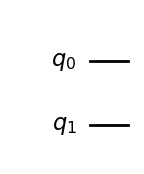

In [48]:
#Importing Required libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram


#We give the name qu_circuit(shortcut for quantum circuit) for our quantum circuit.
#Important note:  It doesn't matter the name of the circuit this is only for make it clear for you.

#Here creating a two qubit quantum circuit
qu_circuit = QuantumCircuit(2)

#Draw the circuit
qu_circuit.draw('mpl')

### Sec2.1: $X$ Gate
Our first gate to discuss on this notebook.

The **$X$ (NOT) gate** is a single-qubit gate when applied to a qubit it will flip it's state.

When you apply $X$ gate to $|0\rangle$ the result is: $|1\rangle$. (adapted from **[2]**)

When you apply $X$ gate on $|1\rangle$ the result is: $|0\rangle$. (adapted from **[2]**)

So the operation is similiar to the classical NOT gate which is known as the bit flip. (adapted from **[2]**).

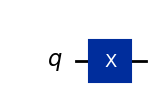

In [49]:
#Here is the Python code of applying X gate

#First Create our single qubit Quantum Circuit
qu_circuit = QuantumCircuit(1)

#Apply X gate on qubit one(indexed as 0) → flip the state from |0⟩ to |1⟩
qu_circuit.x(0)

#Draw the circuit
qu_circuit.draw('mpl')

"In IBM Quantum, the initial state is set to $|0\rangle$". **[2]**
##### What happened above?

What happend above is our qubit is initilized in state $|0\rangle$ by  defualt, and we applied X gate on it, so it's state flipped to state $|1\rangle$.

### Sec2.2: Hadamard Gate
The hadamard (H) gate is a single-qubit gate that applies superposition state on the qubit that it is applied to.

When applying H gate to state $|0\rangle$ it creates a superposition state between state $|0\rangle$ and state $|1\rangle$, mathematically expressed as: $H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}. \quad$ (adapted from **[2]**)

When applying H gate to state $|1\rangle$ it creates a superposition state between state $|0\rangle$ and state $|1\rangle$, mathematically expressed as:
$H|1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$. (adapted from **[2]**)

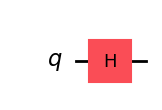

In [50]:
#Here is the python code of applying H gate

#First Create our single qubit Quantum Circuit
qu_circuit = QuantumCircuit(1)

#Apply Hadamard gate on qubit one(indexed here as (0)) → creates superposition
qu_circuit.h(0)

#Draw the circuit
qu_circuit.draw('mpl')

##### What happened above?

What happened above is that our qubit is initialized in the state $|0\rangle$ by default, and we applied the Hadamard gate (H) to it.
This creates a superposition of both states $|0\rangle$ and $|1\rangle$ at the same time.
Mathematically, this is expressed (from **[2]**) as: $H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}. \quad$


<div class="alert alert-block alert-success">
<b>Ex1: Translating the mathematical expression into a quantum circuit</b><br><br>

<b>What to do?</b>  
You need to translate the mathematical expression
"$H|1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$" into a quantum circuit.
</div>

<div class="alert alert-info">
<details>
    <summary><b>Find Hint with Two Questions here</b> (Click to expand)</summary>

<ul>
<li>Do you remember what we talked about earlier in the X gate section?</li>
<li>Do you remember what the Hadamard gate does when applied to the states "$|0\rangle$" and "$|1\rangle$"?  
What do we get as a result?</li>
</ul>

</details>
</div>

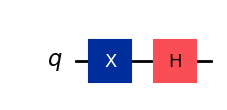

In [51]:
#Here creating our single qubit quantum circuit
qu_circuit = QuantumCircuit(1)

# X gate on state |0> : from |0⟩ to |1⟩
# H gate on state |0> : H|0>= (|0>+|1>)/sqrt(2)

#Another hint: apply the two gates sequentially to the qubit
qu_circuit.x(0)
qu_circuit.h(0)


#draw the circuit
qu_circuit.draw('mpl')

<div class="alert alert-info">
<details>
    <summary><b>Your answer must be like this:</b> (Click to expand)</summary>

<pre>
# Here creating our single qubit quantum circuit
qu_circuit = QuantumCircuit(1)

# Another hint: apply the two gates sequentially to the qubit

# Apply X gate to flip the state from |0⟩ to |1⟩
qu_circuit.x(0)

# Apply Hadamard gate → creates superposition(H|1⟩ = (|0⟩ - |1⟩)/√2):
qu_circuit.h(0)

#Draw the circuit
qu_circuit.draw('mpl')
</pre>

</details>
</div>

### Sec2.3: CNOT Gate
"A CNOT("Controlled NOT" or CX) gate is a two-qubit gate, meaning its action involves two qubits at once: the control qubit and the target qubit". **[2]**

A CNOT flips(Apply the X(NOT) gate to) the target qubit only if the control qubit is state is $|1\rangle$.(adapted from **[2]**)

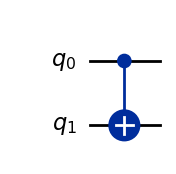

In [52]:
#Here is the Python code of applying CNOT gate

#First Create our two qubit Quantum Circuit
qu_circuit = QuantumCircuit(2)

#Apply CNOT gate → (Control qubit, target qubit)
qu_circuit.cx(0,1)

#Draw the circuit
qu_circuit.draw('mpl')

##### What happened above?

What happened above is that we applied a CNOT gate where:

* Qubit 1 (q0) is the control qubit.

* Qubit 2 (q1) is the target qubit.

Since both qubits are initialized in state $|0\rangle$ by default,
and the control qubit is in $|0\rangle$, the CNOT gate does nothing.

That’s because the CNOT gate only flips the target qubit if the control qubit is in state $|1\rangle$.
In this case, the control is in $|0\rangle$, so no flip happens.

The final state of the system remains: $|00\rangle$

Before going any further, let's measure some of the earlier quantum circuits we have built:

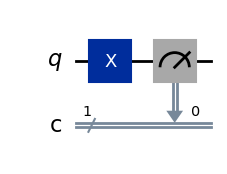

In [53]:
#First Create our single qubit Quantum Circuit and  one classical bit (cbit) to store the result of the measurement
qu_circuit = QuantumCircuit(1,1)

# Apply the X gate on qubit 1 (indexed as 0) → flips from |0⟩ to |1⟩
qu_circuit.x(0)

# Measure qubit 1 (indexed as 0) and store it in classical bit 1 (indexed as 0)
qu_circuit.measure(0, 0)

#Draw the circuit
qu_circuit.draw('mpl')

##### What happened above?

The qubit was initially in the state $|0\rangle$.

After applying the X gate, the state flipped from $|0\rangle$ to $|1\rangle$.

Upon measurement, we always get 1 as the output, because the qubit is now in a definite state of $|1\rangle$.

Now, let's measure the eariler Hadamard example quantum circuit:

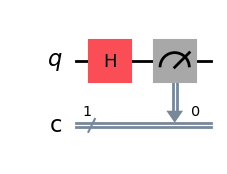

In [54]:
#First Create our single qubit Quantum Circuit and  1 classical bit (cbit) to store the result of the measurement
qu_circuit = QuantumCircuit(1,1)

#Apply Hadamard gate on qubit one(indexed here as 0) → creates superposition
qu_circuit.h(0)

#Measure qubit 1 (indexed as 0) and store it in classical bit 1 (indexed as 0)
qu_circuit.measure(0, 0)

#Draw the circuit
qu_circuit.draw('mpl')

##### What happend above?

After applying the Hadamard gate to a qubit initially in state $|0\rangle$, the qubit is placed in a superposition between $|0\rangle$ and $|1\rangle$, mathematically expressed (from **[2]**) as:

$H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}. \quad$

This means the qubit is in both states at the same time, each with equal probability (50%).

However, once measured, the superposition collapses into a single state:

50% chance of getting $|0\rangle$

50% chance of getting $|1\rangle$



<div class="alert alert-block alert-success">
<b>Ex2: Try to measure a two-qubit quantum circuit by yourself!</b><br><br>

<b>What to do?</b>  
You need to apply an X gate to qubit 1, then apply a CNOT gate to the circuit,  
where qubit 1 is the control qubit and qubit 2 is the target qubit.  
Finally, measure the two qubits to explore what results you get.
</div>

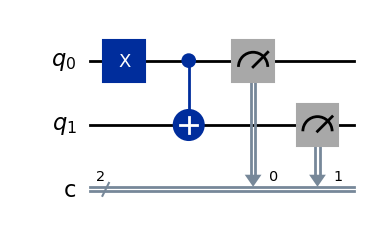

In [55]:
#First Create our two qubits Quantum Circuit and  2 classical bits (cbits) to store the result of the measurements
qu_circuit = QuantumCircuit(2,2)

#Here write your code
qu_circuit.x(0)
qu_circuit.cx(0,1) # control q, target q

#Here measure your circuit

qu_circuit.measure(0, 0) #Don't forget when measuring a qubits you need to use a classical bits to store the informations
qu_circuit.measure(1, 1) #Measure qubit 2 and store it on classical bit two

#Draw the circuit
qu_circuit.draw('mpl')

<div class="alert alert-info">
<details>
    <summary><b>Your answer must be like this:</b> (Click to expand)</summary>

<pre>
#First Create our two qubits Quantum Circuit and  2 classical bits (cbits) to store the result of the measurements
qu_circuit = QuantumCircuit(2,2)

#Here write your code
qu_circuit.x(0)      # Apply the X gate on qubit 1 (indexed as 0) → flips from |0⟩ to |1⟩


qu_circuit.cx(0, 1)  #Apply CNOT gate → (Control qubit, target qubit)

#Here measure your circuit

qu_circuit.measure(0, 0) #Don't forget when measuring a qubits you need to use a classical bits to store the informations

qu_circuit.measure(1, 1) #Measure qubit 2 and store it on classical bit two

#Draw the circuit
qu_circuit.draw('mpl')
</pre>

</details>
</div>

##### What happend here?
After applying the X gate to qubit 1 (q0), its state becomes $|1\rangle$, while qubit 2 (q1) remains in $|0\rangle$, forming the state $|01\rangle$.

Next, we apply a CNOT gate with qubit 1 (q0) as the control and qubit 2 (q1) as the target.  
Since the control qubit is in state $|1\rangle$, the CNOT flips the target qubit from $|0\rangle$ to $|1\rangle$.

Now the system becomes $|11\rangle$.

So when we measure both qubits, we **always** get the output: $|11\rangle$


## Chapter 3 — Building Your First Quantum Circuit Using Qiskit from Scratch

Before building your first quantum circuit, let's briefly introduce two important concepts:

### Sec 3.1: Aer Simulator  
The Aer Simulator (from the Qiskit library) is a tool that allows us to **simulate quantum circuits on classical computers**.  
It helps us **observe and visualize the results** of our quantum circuits before running them on real quantum hardware.


Now, let's run the eariler Hadamard gate example using Aer simulator.  

**Note**: The Aer simulator code used here is adapted from reference **[2]**.

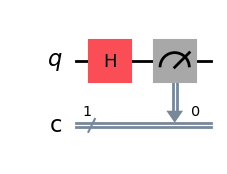

In [56]:
#First Create our single qubit Quantum Circuit and  1 classical bit (cbit) to store the result of the measurement
qu_circuit = QuantumCircuit(1,1)

#Apply Hadamard gate on qubit one(indexed here as 0) → creates superposition
qu_circuit.h(0)

#Measure qubit 1 (indexed as 0) and store  the result in classical bit 1 (indexed as 0)
qu_circuit.measure(0, 0)

#Draw the circuit
qu_circuit.draw('mpl')

{'1': 492, '0': 508}


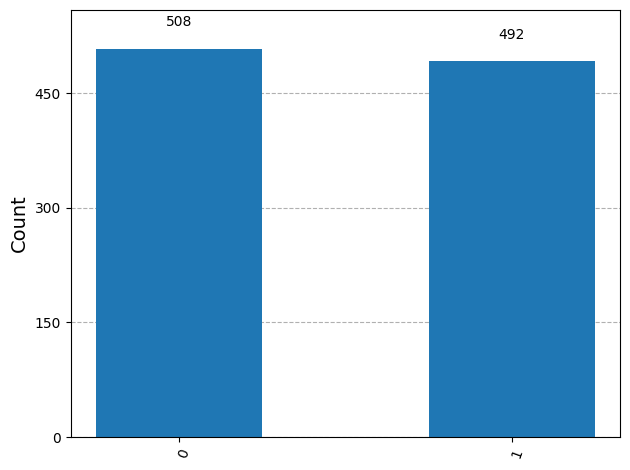

In [57]:
#Run our quantum circuit above using Aer simulator
simulator = AerSimulator() #Building Aer Simulator

#Preparing the quantum circuit (using "transpile") to run on the Aer simulator
transpiled_circuit = transpile(qu_circuit, simulator) # transpile(our circuit, simulator that we build above)

#Run the simulator
result = simulator.run(transpiled_circuit,shots=1000).result() #we here run the circuit 1000 times (shots) and get the result

#get counts
counts = result.get_counts()

print(counts) #printing the counts

#Draw the Histogram
plot_histogram(counts)

##### What happened here?
After applying the Hadamard gate to qubit 1, it goes from the state ∣0⟩ to a superposition:

$H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}.$

This means there's a 50% chance of measuring $|0\rangle$ and a 50% chance of measuring $|1\rangle$.

When we measure the qubit, the superposition collapses, and we get either $|0\rangle$ or $|1\rangle$.

Since we run the circuit 1000 times (shots=1000), we get approximately:

{'0': ~500, '1': ~500}

So the histogram shows a balanced distribution between 0 and 1.

### Sec3.2: Bell State
"In quantum information theory, a Bell state is specific quantum state of two qubits that represents the simplest and most studied example of quantum entanglement."**[3]**  
Mathematically expressed as:

$|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$. from **[3]**

<div class="alert alert-block alert-success">
<b>Ex3: Build Your First Quantum Circuit Using Qiskit from Scratch!</b><br><br>

<b>Brief Explanations:</b><br>

<ul>
<li>First, you need to create a quantum circuit with <b>two qubits</b> and <b>two classical bits</b> to store the measurement results.<br>
It's important to name your quantum circuit <code>bell_circuit</code>.</li><br>

<li>Second, apply a <b>Hadamard gate</b> to qubit 0 (<code>q0</code>).</li><br>

<li>Third, apply a <b>CNOT gate</b> with qubit 1 (<code>q0</code>) as the control and qubit 2 (<code>q1</code>) as the target.</li><br>

<li>Optionally, you can measure both qubits and Draw the circuit.</li>
</ul>

<b>What to do?</b><br>
Now it's your turn to build your first quantum circuit from scratch.  
Good luck!
</div>

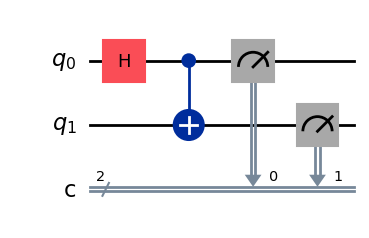

In [58]:
#Build your quantum circuit here:
bell_circuit = QuantumCircuit(2, 2)

bell_circuit.h(0)
bell_circuit.cx(0,1)

bell_circuit.measure(0,0)
bell_circuit.measure(1,1)

bell_circuit.draw('mpl')


<div class="alert alert-info">
<details>
    <summary><b>Your answer must be like this:</b> (Click to expand)</summary>

<pre>
# First, creating our two qubit quantum circuit, with two classical bits to store the results of the measurements
bell_circuit = QuantumCircuit(2,2)

#Apply Hadamard gate on qubit one(indexed here as 0) → creates superposition
bell_circuit.h(0)

#Apply CNOT gate → (Control qubit, target qubit) → make the qubits entangled
bell_circuit.cx(0,1)

#Optional: Measurements and Drawing

#Measure the qubits
bell_circuit.measure(0,0) #Measure qubit 1 (indexed as 0) and store the result in classical bit 1 (indexed as 0)
bell_circuit.measure(1,1) #Measure qubit 2 (indexed as 1) and store the result in classical bit 2 (indexed as 1)

#Draw the circuit
bell_circuit.draw('mpl')
</pre>

</details>
</div>

{'11': 494, '00': 506}


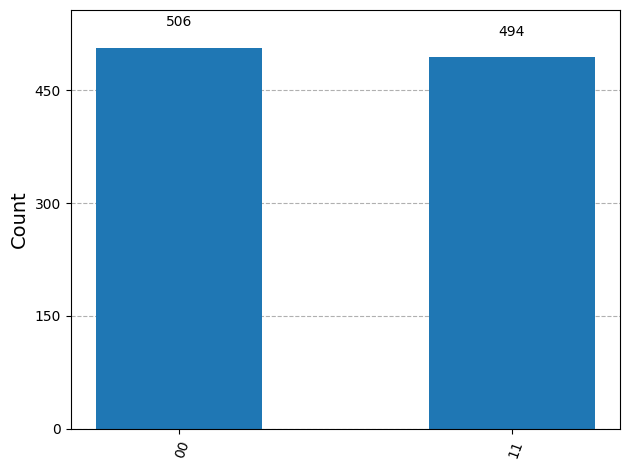

In [59]:
#Run our quantum circuit above using Aer simulator
simulator = AerSimulator() #Building Aer Simulator

#Preparing the quantum circuit (using "transpile") to run on the Aer simulator
transpiled_circuit = transpile(bell_circuit, simulator) # transpile(our circuit, simulator that we build above)

#Run the simulator
result = simulator.run(transpiled_circuit,shots=1000).result() #we here run the circuit 1000 times (shots) and get the result

#get counts
counts = result.get_counts()

print(counts) #printing the counts

#Draw the Histogram
plot_histogram(counts)

#### What happend here?
We built a Bell State circuit from scratch:

We applied a Hadamard gate to qubit 1 (q0), placing it in a superposition:   
$H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ (adapted from **[2]**)

Then we applied a CNOT gate with qubit 1 (q0) as the control and qubit 2 (q1) as the target.   
This entangled the two qubits and creates (bell state):   
$|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$. (from **[3]**)

When measuring both qubits over many times (shots), we expect to see either $|00\rangle$ or $|11\rangle$ with nearly equal probability.

This means:

If the first qubit is measured as $|0\rangle$, the second will also be $|0\rangle$.

If the first qubit is $|1\rangle$, the second will be $|1\rangle$.

These correlated outcomes are the signature of quantum entanglement.



#### Congratulations!🎉

##### You’ve just built your very first quantum circuit from scratch!

## Chapter4 — 🎯 Wrapping Up

So… does this mean you're officially a quantum developer now? 😄  
Just kidding! (Or maybe not...)  
Either way, making it this far is a big achievement — well done!

In this notebook, you’ve taken your first steps into the world of quantum computing.  
You learned both the **theory and practice** of core quantum concepts using Qiskit, including:

- What quantum computing is and how it differs from classical computing  
- How **qubits** can be in **superposition**  
- What **entanglement** means and why it matters  
- The role of **quantum gates** like X, H, and CNOT  
- How to build circuits and simulate them using **AerSimulator**  
- How to measure quantum states and interpret the results  
- And finally... how to build your very first full quantum circuit: a **Bell State!** 🎉  

---

### Sec4.1: 🧠 Did you find this helpful?

If yes, I’d love to hear your thoughts.  
Please take a minute to fill out this short feedback form — it helps me know how many people benefited and how I can improve:

📬 **[Click here to share your feedback](https://forms.gle/jVmfZvyfrFyKdpmb7)**

---

## Sec4.2: 📚 Useful Open-Source Resources:

- [Introduction to Classical and Quantum Computing by Thomas Wong. -book](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf)
- [IBM Quantum Learning Platform](https://quantum.cloud.ibm.com/learning/en)
- [Qiskit Documentation](https://qiskit.org/documentation/)  
- [IBM Quantum Lab](https://quantum-computing.ibm.com/)  
- [Understanding Quantum Information and Computation by John Watrous - book](https://arxiv.org/abs/2507.11536)
- [Qiskit Youtube channel](https://www.youtube.com/channel/UClBNq7mCMf5xm8baE_VMl3A)
---

## Sec4.3: 🔍 References:

[1] : https://www.ibm.com/think/topics/quantum-computing   
[2] : https://quantum.cloud.ibm.com/learning/en/courses/utility-scale-quantum-computing/bits-gates-and-circuits   
[3] : https://en.wikipedia.org/wiki/Bell_state   
**Note:** Content related to *Bell State* is partially adapted from [Wikipedia][3], licensed under [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/).   

---

## Sec4.4: 🙏 Special Thanks

Huge thanks to the authors of the open-source resources,  
and to everyone who contributes to making quantum computing more accessible to the world.

---

With kind regards,  
**Hassan Alhusayni**  
Your fellow quantum newbie developer friend ⚛️🤍

📬 Connect with me:  
- **LinkedIn**: [linkedin.com/in/hassan-alhusayni](https://www.linkedin.com/in/hassan-alhusayni/)  
- **GitHub**: [github.com/Hassan-Alhusayni](https://github.com/Hassan-Alhusayni)
- **Email**: hassansulaiman1719@gmail.com
- **Medium**: https://medium.com/@hassansulaiman1719
- **Dev.to**: https://dev.to/hassanalhusayni
- **X(Twitter)**: https://x.com/I1Hassan1
---

Sec4.5: Farewell from Your Quantum Friend ⚛️:

**Well well... welcome!**  
But not just any welcome — this one's for a special kind of noob...

The kind who understands superposition, activated entanglement,  
and just built a Bell State from scratch 😎⚛️

That makes you officially:  
> **Certified Quantum Noob™ — but dangerous.**


# TransUnion Capstone Work

### **Figure 10:** Example of a QSVM transpiled job circuit for 3 features
from Quantum Paper
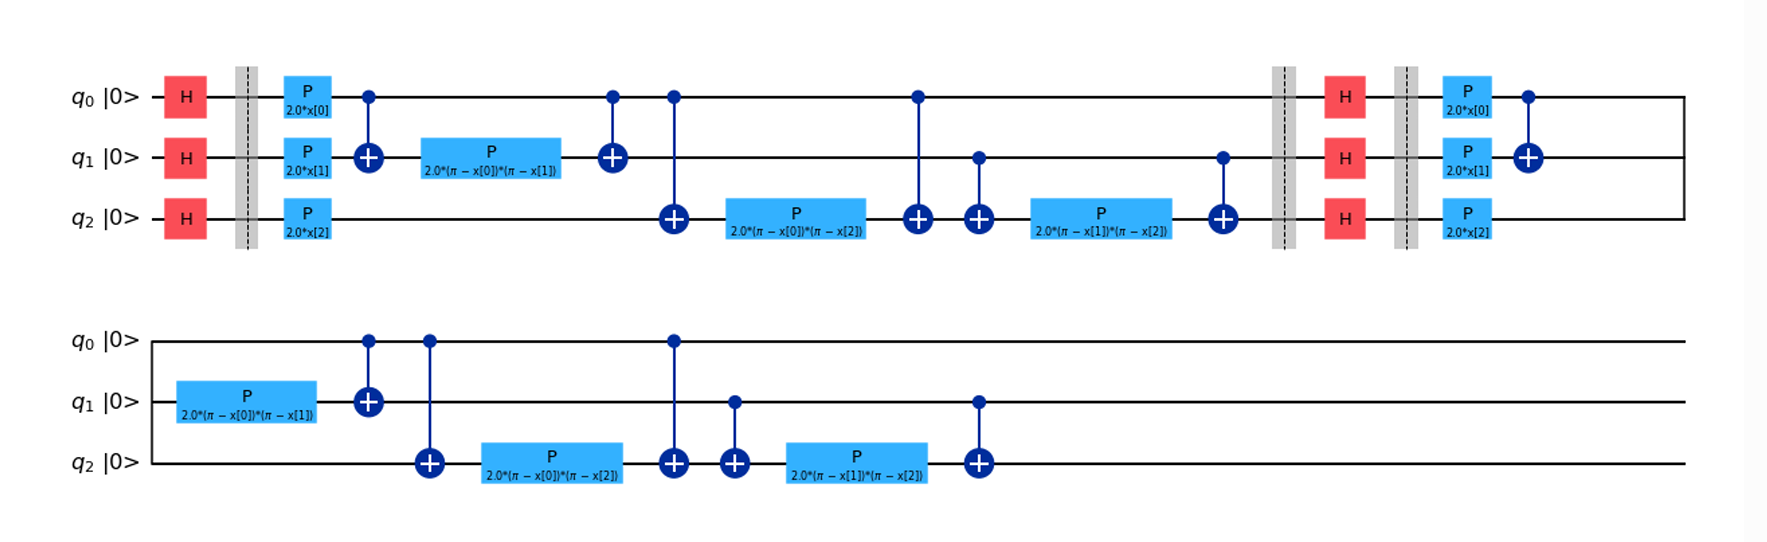

### Restructuring Circuits from Figure 10

2 circuits that will be referred to as 1 and 2

---  

#### Questions that came up for me:

**What does the dotted line mean?**

The dotted lines mark one repeated layer of the feature map. They show where the circuit block would be repeated if we increase depth.

Everything between these dashed lines is one repeated unit of the feature map.

**What is the P block?**

The P gate applies a phase rotation to the |1⟩ state, and in this circuit it is used to encode classical feature values as quantum phases that later influence interference and similarity computations.

In Qiskit, the P gate is defined as:

**𝑃(𝜃) = \
[1 0 \
0 𝑒^𝑖𝜃]**

It acts on a single qubit state: **∣𝜓⟩=𝛼∣0⟩+𝛽∣1⟩**

as: **𝑃(𝜃)∣𝜓⟩=𝛼∣0⟩+𝛽𝑒^𝑖𝜃∣1⟩**

So:
+ ∣0⟩ is unchanged
+ ∣1⟩ gains a phase 𝑒^𝑖𝜃

**I see there are difference formulas for the phase gate? Why and what do they do?**

3 common gates:
+ qiskit phase gate
+ RZ gate (Z rotation) \
**𝑃(𝜃) = \
[𝑒^(-𝑖𝜃/2) 0 \
0 𝑒^𝑖𝜃/2 ]**
  + ∣0⟩ gains a phase 𝑒^-𝑖𝜃/2
  + ∣1⟩ gains a phase 𝑒^𝑖𝜃/2
+ U1 gate (old qiskit, same as P)


**Why did we do a kernel test before toy dataset?**

To check that the quantum feature map is behaving like a valid similarity function before building models on top of it.

---

**Circuit 1:** 3 cubits \
**Input:** x = (x0, x1, x2) \
q0 - Hadamard gate - barrier - Phase gate - CNOT on q1 - CNOT on q1 - CNOT on q2 - CNOT on q2 - barrier - Hadamard gate - barrier - Phase gate    \
q1 - Hadamard gate - Phase gate - CNOT from q0 - Phase gate - CNOT from q1 - barrier - Hadamard gate - barrier - Phase gate  \
q2 - Hadamard gate - barrier - Phase gate - CNOT from q2 - Phase gate - CNOT from q0 - CNOT from q1 - Phase gate - CNOT from q1 - barrier - Hadamard gate - barrier - Phase gate

**Circuit 2:** 3 cubits \
**Input:** x = (x0, x1, x2) \
q0 - CNOT on q1 - CNOT on q2    \
q1 - P gate - CNOT from q0 - CNOT on q2 - CNOT on q2 \
q2 - CNOT from q0 - P gate - CNOT from q0 - CNOT from q1 - P gate - CNOT from q1

In [60]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import numpy as np

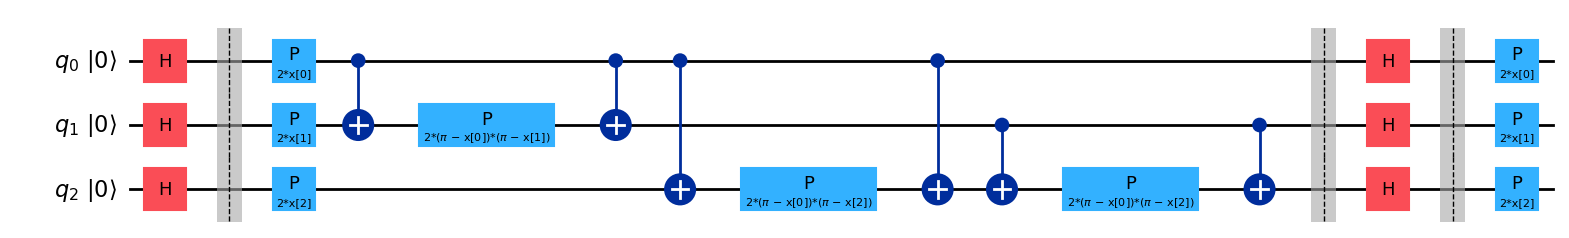

In [61]:
# Circuit A
x = ParameterVector("x", 3)

qc1 = QuantumCircuit(3)

# order does matter
qc1.h(0)
qc1.h(1)
qc1.h(2)

qc1.barrier() # to add the dotted line
qc1.p(2.0 * x[0], 0)
qc1.p(2.0 * x[1], 1)
qc1.p(2.0 * x[2], 2)

qc1.cx(0,1)
qc1.p(2.0 * (np.pi - x[0]) * (np.pi - x[1]), 1)
qc1.cx(0,1)
qc1.cx(0,2)
qc1.p(2.0 * (np.pi - x[0]) * (np.pi - x[2]), 2)
qc1.cx(0,2)
qc1.cx(1,2)
qc1.p(2.0 * (np.pi - x[0]) * (np.pi - x[2]), 2)
qc1.cx(1,2)

qc1.barrier()
qc1.h(0)
qc1.h(1)
qc1.h(2)
qc1.barrier()

qc1.p(2.0 * x[0], 0)
qc1.p(2.0 * x[1], 1)
qc1.p(2.0 * x[2], 2)

# qc.draw("text")
qc1.draw("mpl", initial_state=True)

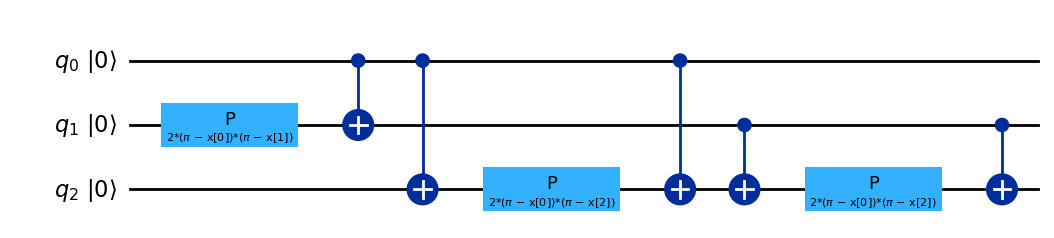

In [67]:
# Circuit B
x = ParameterVector("x", 3)

qc2 = QuantumCircuit(3)

# order does matter
qc2.p(2.0 * (np.pi - x[0]) * (np.pi - x[1]), 1)
qc2.cx(0,1)
qc2.cx(0,2)
qc2.p(2.0 * (np.pi - x[0]) * (np.pi - x[2]), 2)
qc2.cx(0,2)
qc2.cx(1,2)
qc2.p(2.0 * (np.pi - x[0]) * (np.pi - x[2]), 2)
qc2.cx(1,2)

# qc.draw("text")
qc2.draw("mpl", initial_state=True)


In [63]:
# kernel test
import numpy as np
from qiskit.quantum_info import Statevector

x      = np.array([0.1, 0.2, 0.3])
x_same = np.array([0.1, 0.2, 0.3])
x_mid  = np.array([0.6, 0.2, 0.9])
x_far  = np.array([2.0, 2.1, 2.2])

params = list(qc1.parameters)   # should be [x[0], x[1], x[2]] in some order
print("Parameter order:", params)

bind_x      = {params[0]: float(x[0]),      params[1]: float(x[1]),      params[2]: float(x[2])}
bind_x_same = {params[0]: float(x_same[0]), params[1]: float(x_same[1]), params[2]: float(x_same[2])}
bind_x_mid  = {params[0]: float(x_mid[0]),  params[1]: float(x_mid[1]),  params[2]: float(x_mid[2])}
bind_x_far  = {params[0]: float(x_far[0]),  params[1]: float(x_far[1]),  params[2]: float(x_far[2])}

qc_x      = qc1.assign_parameters(bind_x, inplace=False)
qc_x_same = qc1.assign_parameters(bind_x_same, inplace=False)
qc_x_mid  = qc1.assign_parameters(bind_x_mid, inplace=False)
qc_x_far  = qc1.assign_parameters(bind_x_far, inplace=False)

sv_x      = Statevector.from_instruction(qc_x)
sv_x_same = Statevector.from_instruction(qc_x_same)
sv_x_mid  = Statevector.from_instruction(qc_x_mid)
sv_x_far  = Statevector.from_instruction(qc_x_far)

K_x_x     = np.abs(np.vdot(sv_x.data, sv_x.data))**2
K_x_same  = np.abs(np.vdot(sv_x.data, sv_x_same.data))**2
K_x_mid   = np.abs(np.vdot(sv_x.data, sv_x_mid.data))**2
K_x_far   = np.abs(np.vdot(sv_x.data, sv_x_far.data))**2

print("K(x, x)      =", float(K_x_x)) # should be approx 1
print("K(x, x_same) =", float(K_x_same))
print("K(x, x_mid)  =", float(K_x_mid))
print("K(x, x_far)  =", float(K_x_far)) # should be smaller than mid

Parameter order: [ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2])]
K(x, x)      = 0.9999999999999984
K(x, x_same) = 0.9999999999999984
K(x, x_mid)  = 0.01002500062150807
K(x, x_far)  = 0.037380421006946656


In [64]:
# Run with Toy dataset

## Shahmir's Work

In [65]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

# 3 qubits, 3 classical bits
qc = QuantumCircuit(3, 3)

# ~8 gates
qc.h(0)          # Hadamard gate on qubit 0
qc.cx(0, 1)     # CNOT gate with control qubit 0 and target qubit 1
qc.rz(1.57, 1)  # phase rotation on qubit 1
qc.cx(1, 2)     # CNOT gate with control qubit 1 and target qubit 2
qc.x(2)         # Flip qubit 2
qc.rx(0.78, 0)  # rotation around x-axis on qubit 0
qc.cx(0, 2)     # CNOT gate with control qubit 0 and target qubit 2, more entanglement
qc.h(2)         # Interference on qubit 2

qc.measure([0, 1, 2], [0, 1, 2])  # Measure all qubits

print(qc.draw("text"))
# print(qc.draw("mpl")) # doesnt show

# A) Statevector Simulation (ideal math view, no shots)
qc_no_meas = qc.remove_final_measurements(inplace=False)
sv = Statevector.from_instruction(qc_no_meas)
print("Statevector Simulation Result:", sv.probabilities_dict())

# B) Qiskit Aer Simulator (with shots) (what you would run on a real quantum computer)
sim = AerSimulator()
compiled_circuit = transpile(qc, sim, optimization_level=1)
result = sim.run(compiled_circuit, shots=2000).result()
counts = result.get_counts(compiled_circuit)
print("Qiskit Aer Simulator Result:", counts)

     ┌───┐     ┌──────────┐                       ┌─┐   
q_0: ┤ H ├──■──┤ Rx(0.78) ├───────────────■───────┤M├───
     └───┘┌─┴─┐├──────────┤          ┌─┐  │       └╥┘   
q_1: ─────┤ X ├┤ Rz(1.57) ├──■───────┤M├──┼────────╫────
          └───┘└──────────┘┌─┴─┐┌───┐└╥┘┌─┴─┐┌───┐ ║ ┌─┐
q_2: ──────────────────────┤ X ├┤ X ├─╫─┤ X ├┤ H ├─╫─┤M├
                           └───┘└───┘ ║ └───┘└───┘ ║ └╥┘
c: 3/═════════════════════════════════╩════════════╩══╩═
                                      1            0  2 
Statevector Simulation Result: {np.str_('000'): np.float64(0.21386419225153458), np.str_('001'): np.float64(0.03613580774846533), np.str_('010'): np.float64(0.03613580774846533), np.str_('011'): np.float64(0.21386419225153458), np.str_('100'): np.float64(0.21386419225153458), np.str_('101'): np.float64(0.03613580774846533), np.str_('110'): np.float64(0.03613580774846533), np.str_('111'): np.float64(0.21386419225153458)}
Qiskit Aer Simulator Result: {'101': 75, '110': 78, '001': 79, 

In [66]:
import numpy as np
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap

# 3 features so 3 qubits
feature_map = ZZFeatureMap(feature_dimension=3, reps=1, entanglement='full')
print(feature_map.draw("text"))

# Example feature vector (often normalized; paper mentions scaling to [-1, 1])
x = np.array([0.2, -0.4, 0.9])

# Bind parameters in order
bound = feature_map.assign_parameters(x, inplace=False)

# To get measurement counts, add measurements
qc = bound.copy()
qc.measure_all()

qc = bound.copy()
qc.measure_all()

sim = AerSimulator()
tqc = transpile(qc, sim, optimization_level=3)
print("Transpiled Depth:", tqc.depth())
print("Gate Counts:", tqc.count_ops())
print(tqc.draw("text"))
# print(tqc.draw("mpl")) # doesnt show

result = sim.run(tqc, shots=2048, seed_simulartor=12345).result()
print("Measurement Counts:", result.get_counts())

     ┌───────────────────────────────┐
q_0: ┤0                              ├
     │                               │
q_1: ┤1 ZZFeatureMap(x[0],x[1],x[2]) ├
     │                               │
q_2: ┤2                              ├
     └───────────────────────────────┘


/tmp/ipython-input-91877229.py:7: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=3, reps=1, entanglement='full')


Transpiled Depth: 11
Gate Counts: OrderedDict({'cx': 6, 'u2': 3, 'p': 3, 'measure': 3, 'barrier': 1})
         ┌────────────┐                                                   »
   q_0: ─┤ U2(0.4,-π) ├──■─────────────────■────■─────────────────■───────»
        ┌┴────────────┤┌─┴─┐┌───────────┐┌─┴─┐  │                 │       »
   q_1: ┤ U2(-0.8,-π) ├┤ X ├┤ P(20.836) ├┤ X ├──┼─────────────────┼────■──»
        └┬────────────┤└───┘└───────────┘└───┘┌─┴─┐┌───────────┐┌─┴─┐┌─┴─┐»
   q_2: ─┤ U2(1.8,-π) ├───────────────────────┤ X ├┤ P(13.188) ├┤ X ├┤ X ├»
         └────────────┘                       └───┘└───────────┘└───┘└───┘»
meas: 3/══════════════════════════════════════════════════════════════════»
                                                                          »
«                           ░ ┌─┐      
«   q_0: ───────────────────░─┤M├──────
«                           ░ └╥┘┌─┐   
«   q_1: ───────────────■───░──╫─┤M├───
«        ┌───────────┐┌─┴─┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ P(1